In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from math import nan
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Dataset File

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/train.csv?raw=true'
df = pd.read_csv(dataset_url)

## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/test.csv?raw=true'
dt=pd.read_csv(test_url)

## Sample Submission File

In [ ]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [ ]:
df.sample(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
51471,51471,Dodge,Charger SRT Hellcat Widebody,2017,78717,Gasoline,707.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,28900
44038,44038,Ford,F-150 XLT,2017,67000,E85 Flex Fuel,385.0HP 5.0L 8 Cylinder Engine Flex Fuel Capab...,A/T,Gray,Black,None reported,Yes,22000
77861,77861,RAM,1500 Laramie,2021,12875,Gasoline,395.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,Yes,66500
61735,61735,Mitsubishi,Outlander Sport 2.4 SE,2019,67039,Gasoline,2.4L I4 16V MPFI DOHC,Automatic CVT,Platinum Gray Metallic,Black,At least 1 accident or damage reported,Yes,33290
49670,49670,Toyota,Avalon Limited,2007,170000,Gasoline,268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Silver,Gray,None reported,Yes,7500
48577,48577,BMW,335 i,2004,58350,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Silver,–,None reported,Yes,11500
107777,107777,Mercedes-Benz,Sprinter 2500 Standard Roof,2016,157272,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,A/T,White,Black,At least 1 accident or damage reported,Yes,34995
14820,14820,Kia,Telluride SX,2022,14636,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Red,Ebony,None reported,NaN,46105
51673,51673,Ford,F-150 XLT,2015,62662,Gasoline,325.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,White,Gray,None reported,Yes,26000
57754,57754,Ford,F-150 XLT,2016,65441,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,21000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [ ]:
df.fillna(0, inplace = True)
df['title_label'] = df['clean_title'].map({'Yes' : 1, 0 : 0})
dt.fillna(0, inplace = True)
dt['title_label'] = dt['clean_title'].map({'Yes' : 1, 0 : 0})
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,title_label
51649,51649,Ford,Expedition EL King Ranch,2013,134000,E85 Flex Fuel,310.0HP 5.4L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Gold,Brown,At least 1 accident or damage reported,Yes,14500,1
38566,38566,Ford,F-150 Lightning XLT,2019,68750,Gasoline,563.0HP Electric Motor Electric Fuel System,A/T,Blue,Black,None reported,Yes,27350,1
97093,97093,Cadillac,CT6 Luxury,2019,41500,Gasoline,335.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,–,None reported,Yes,32400,1
126955,126955,Lexus,RX 350 F Sport Performance,2021,12000,Gasoline,295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Red,None reported,Yes,65000,1
30024,30024,Volkswagen,Jetta S,2013,155382,Gasoline,170.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,10300,1


In [ ]:
df.brand.unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

LUXURY, AGE, HORSEPOWER

In [ ]:
luxury_brands = ['MINI', 'Lincoln', 'Genesis', 'Mercedes-Benz', 'Audi', 'BMW', 'Tesla', 'Cadillac', 'Land Rover', 'Lexus',
                 'Porsche', 'McLaren', 'Rolls-Royce', 'Maserati', 'Bentley', 'Ferrari', 'Aston Martin', 'Lamborghini', 'Lucid', 'Lotus',
                 'Maybach']
df['is_luxury'] = df['brand'].isin(luxury_brands)
dt['is_luxury'] = dt['brand'].isin(luxury_brands)

In [ ]:
df['horsepower'] = df['engine'].str.extract('(\d+\.?\d*)HP', expand=False)
dt['horsepower'] = dt['engine'].str.extract('(\d+\.?\d*)HP', expand=False)
df.fillna(0, inplace = True)
dt.fillna(0, inplace = True)
df.sample(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,title_label,is_luxury,horsepower
92957,92957,Acura,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,F,Silver,Ebony,None reported,0,17995,0,False,0
35053,35053,Ford,Explorer Limited,2020,53450,Gasoline,2.3L I4 16V GDI DOHC Turbo,10-Speed Automatic,Blue,Ebony.,None reported,Yes,49999,1,False,0
171458,171458,Porsche,911 Carrera S,2013,21450,Gasoline,400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Black,0,0,399900,0,True,400.0
164612,164612,BMW,M3 Base,2022,1536,Gasoline,3.0 Liter DOHC Twin Turbo,Automatic,Black,Black,None reported,0,114998,0,True,0
130117,130117,Land,Rover Range Rover Evoque S,2020,40237,Gasoline,2.0 Liter,Automatic,Carpathian Grey Premium Metallic,Cloud,None reported,0,39998,0,False,0
163544,163544,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,12500,1,True,302.0
89603,89603,Ford,Mustang Premium,2007,122000,Gasoline,210.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,11000,1,False,210.0
58996,58996,Land,Rover Range Rover Velar P250 S R-Dynamic,2020,19813,Gasoline,247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,47000,1,False,247.0
48232,48232,Genesis,GV70 3.5T Sport,2022,54002,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Red,None reported,Yes,42000,1,True,375.0
33436,33436,BMW,430 i xDrive,2021,14269,Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,White,None reported,Yes,75000,1,True,248.0


In [ ]:
df.transmission.unique()
at_arr = ['Automatic', 'A/T', 'AT', 'Single-Speed Fixed Gear']
df['trans_lbl'] = df['transmission'].isin(at_arr)
dt['trans_lbl'] = dt['transmission'].isin(at_arr)
df['trans_lbl'] = df['trans_lbl'].map({True: 1, False: 0})
dt['trans_lbl'] = dt['trans_lbl'].map({True: 1, False: 0})
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,title_label,is_luxury,horsepower,trans_lbl
73199,73199,Hummer,H2 Base,2003,130000,Gasoline,316.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10900,1,False,316.0,0
66516,66516,Mercedes-Benz,E-Class E 350 4MATIC,2017,72393,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Black,Black,None reported,Yes,20470,1,True,0,0
37090,37090,Volvo,XC90 T6 Inscription,2020,60000,Gasoline,316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Blue,White,None reported,Yes,36500,1,False,316.0,1
177293,177293,Ford,F-250 XL,2018,23600,E85 Flex Fuel,385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...,A/T,Beige,Gray,None reported,Yes,55000,1,False,385.0,1
111161,111161,Porsche,Cayenne AWD,2021,8228,Gasoline,335.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Green,Black,None reported,Yes,65900,1,True,335.0,0


In [ ]:
from datetime import datetime

current_year = datetime.now().year
df['car_age'] = current_year - df['model_year']
dt['car_age'] = current_year - dt['model_year']
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,title_label,is_luxury,horsepower,trans_lbl,car_age
8737,8737,GMC,Sierra 1500 Denali Ultimate,2017,91420,Gasoline,6.2L V8 16V GDI OHV,10-Speed Automatic,White Frost Tri-Coat,Walnut,None reported,0,21495,0,False,0,0,7
118244,118244,Porsche,Cayenne S,2019,51133,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Black,None reported,Yes,54900,1,True,450.0,0,5
112244,112244,Pontiac,Solstice GXP,2010,109500,Gasoline,260.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,5-Speed A/T,Blue,Black,At least 1 accident or damage reported,Yes,11000,1,False,260.0,0,14
97423,97423,Toyota,Tundra SR5,2020,27123,Gasoline,3.4L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Gray,Black,None reported,0,38298,0,False,0,0,4
128817,128817,Audi,S4 3.0T Premium Plus,2014,82975,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,22000,1,True,333.0,0,10


In [ ]:
df.accident.unique()

array(['None reported', 'At least 1 accident or damage reported', 0],
      dtype=object)

In [ ]:
df['fuel_type'] = df['fuel_type'].map({'Gasoline' : 1, 'E85 Flex Fuel' : 2, 0:0, 'Hybrid' : 3, 'Diesel': 4, 'Plug-In Hybrid' : 5, '-' : 0 , 'not supported' : 0})
dt['fuel_type'] = dt['fuel_type'].map({'Gasoline' : 1, 'E85 Flex Fuel' : 2, 0:0, 'Hybrid' : 3, 'Diesel': 4, 'Plug-In Hybrid' : 5, '-' : 0 , 'not supported' : 0})

In [ ]:
df['accident'] = df['accident'].map({'None reported' : 0, 'At least 1 accident or damage reported' : 1, 0:0})
dt['accident'] = dt['accident'].map({'None reported' : 0, 'At least 1 accident or damage reported' : 1, 0:0})
dt.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,title_label,is_luxury,horsepower,trans_lbl,car_age
98127,286660,Porsche,911 Carrera,2002,67210,1.0,315.0HP 3.6L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,0,Yes,1,True,315.0,0,22
59445,247978,Jaguar,F-TYPE V6 S,2022,18815,1.0,3.0 Liter SC ULEV,Automatic,Black,Black,0,0,0,False,0,1,2
120946,309479,Acura,RDX w/A-Spec Package,2023,13232,1.0,272.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,10-Speed A/T,White,Black,0,Yes,1,False,272.0,0,1
38947,227480,Ford,F-250 Lariat,2015,97700,4.0,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,Gray,Black,0,Yes,1,False,440.0,0,9
98811,287344,Lexus,IS 300 Base,2018,29500,1.0,260.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,0,Yes,1,True,260.0,0,6


In [ ]:
#DF!

label_encoder = LabelEncoder()
df['brand_lbl'] = label_encoder.fit_transform(df['brand'])
# df['fuel_lbl'] = label_encoder.fit_transform(df['fuel_type'])
# df['accident_lbl'] = label_encoder.fit_transform(df['accident'])
df['ext_col_lbl'] = label_encoder.fit_transform(df['ext_col'])
df['int_col_lbl'] = label_encoder.fit_transform(df['int_col'])
df = df.drop(['brand', 'id', 'model', 'fuel_type', 'accident', 'engine', 'transmission', 'clean_title', 'ext_col', 'int_col'],axis=1)
df.sample(5)

,model_year,milage,price,title_label,is_luxury,horsepower,trans_lbl,car_age,brand_lbl,ext_col_lbl,int_col_lbl
102890,2016,102200,27200,1,False,360.0,1,8,11,29,14
164984,2019,4785,749950,1,True,0,0,5,43,234,15
100329,2021,6449,289991,1,False,0,0,3,24,93,14
184636,2021,9100,24000,1,True,425.0,1,3,52,128,152
32016,2006,160000,4900,1,False,300.0,1,18,14,29,14


In [ ]:
#DT!

dt['brand_lbl'] = label_encoder.fit_transform(dt['brand'])
# df['fuel_lbl'] = label_encoder.fit_transform(df['fuel_type'])
# df['accident_lbl'] = label_encoder.fit_transform(df['accident'])
dt['ext_col_lbl'] = label_encoder.fit_transform(dt['ext_col'])
dt['int_col_lbl'] = label_encoder.fit_transform(dt['int_col'])

dt = dt.drop(['brand', 'id', 'model', 'fuel_type', 'accident', 'engine', 'transmission', 'clean_title', 'ext_col', 'int_col'],axis=1)
dt.sample(5)

,model_year,milage,title_label,is_luxury,horsepower,trans_lbl,car_age,brand_lbl,ext_col_lbl,int_col_lbl
104529,2013,70773,1,True,300.0,0,11,4,261,14
63353,2006,201509,1,False,0,0,18,11,261,71
68919,2018,53500,1,False,325.0,1,6,14,29,14
694,2018,73049,1,True,0,0,6,36,302,14
122547,2016,72000,1,False,285.0,1,8,22,29,155


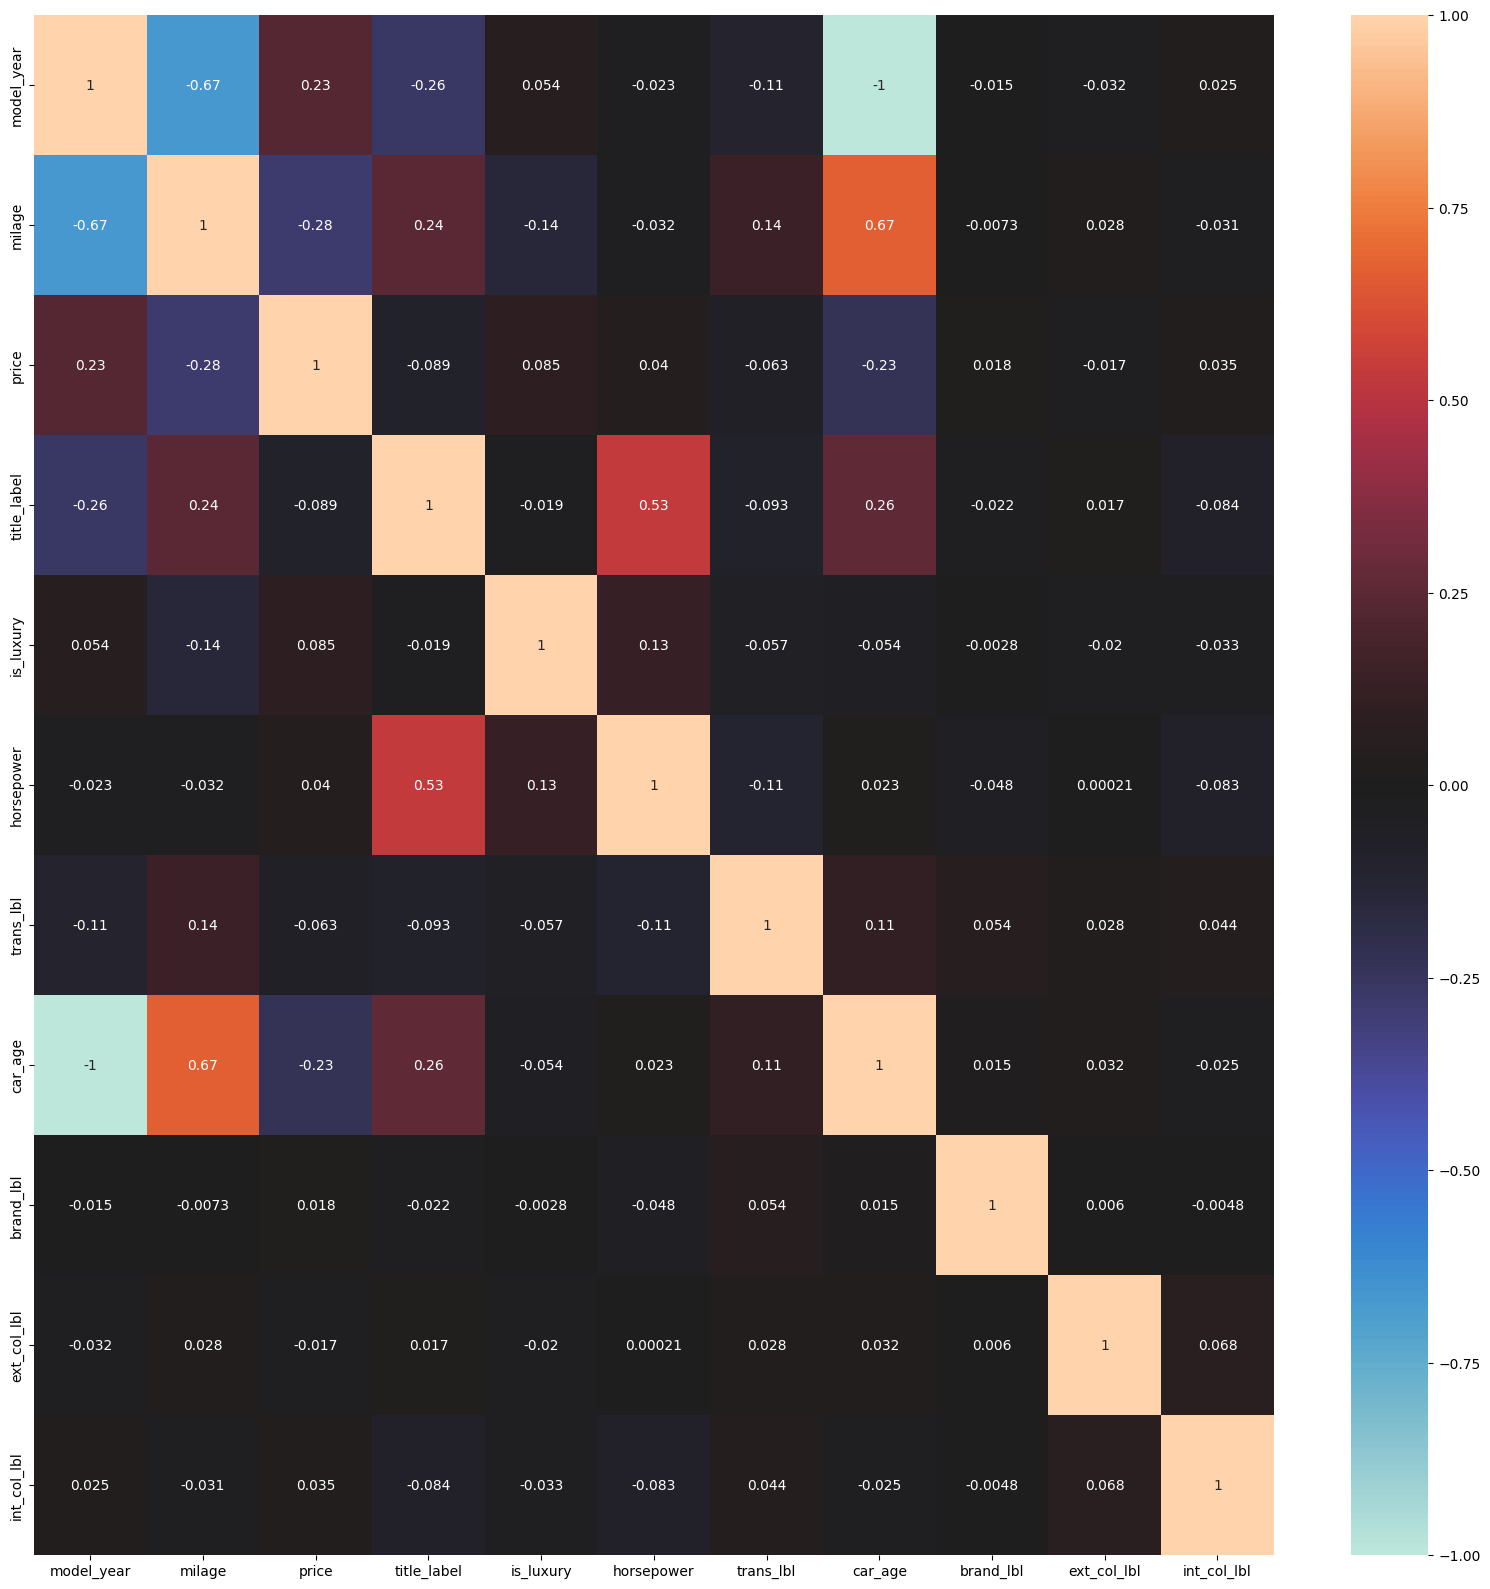

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ["model_year",'price','title_label','is_luxury','horsepower','trans_lbl','car_age','brand_lbl', 'ext_col_lbl', 'int_col_lbl']
scaler = MinMaxScaler()
df[non_boolean_numerical_features] = scaler.fit_transform(df[non_boolean_numerical_features])

In [ ]:
X_scaled = df.drop(['price','ext_col_lbl', 'int_col_lbl', 'brand_lbl', 'model_year'],axis=1)
y_scaled = df['price']
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y_scaled,test_size=0.4,random_state=42)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_pred_train, squared=False)
test_mse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.026416781178723887
Testing MSE: 0.02404684781012592
Training R2 Score: 0.08297831354558394
Testing R2 Score: 0.09743746333081227


In [ ]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   model_year   125690 non-null  int64 
 1   milage       125690 non-null  int64 
 2   title_label  125690 non-null  int64 
 3   is_luxury    125690 non-null  bool  
 4   horsepower   125690 non-null  object
 5   trans_lbl    125690 non-null  int64 
 6   car_age      125690 non-null  int64 
 7   brand_lbl    125690 non-null  int64 
 8   ext_col_lbl  125690 non-null  int64 
 9   int_col_lbl  125690 non-null  int64 
dtypes: bool(1), int64(8), object(1)
memory usage: 8.8+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   model_year   188533 non-null  float64
 1   milage       188533 non-null  int64  
 2   price        188533 non-null  float64
 3   title_label  188533 non-null  float64
 4   is_luxury    188533 non-null  float64
 5   horsepower   188533 non-null  float64
 6   trans_lbl    188533 non-null  float64
 7   car_age      188533 non-null  float64
 8   brand_lbl    188533 non-null  float64
 9   ext_col_lbl  188533 non-null  float64
 10  int_col_lbl  188533 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 15.8 MB


In [ ]:
dt.drop(columns=['brand_lbl', 'ext_col_lbl', 'int_col_lbl', 'model_year'], inplace=True, axis = 1)

In [ ]:
id = sf.pop('id')
y_pred = linear_reg.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'class': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
